# Contents
 The project is implemented in pytorch modular structure for better code organization, loading and pre-processing data is in data.py file, while the models definition can be viewed in the models.py, Additionaly trains.py and eval.py show the training and testing respectively. For ploting data, reusable fucntions are declared inside the plot_utils.py file. At the end, the summary of comparison on the basis of time, parameters, accuracy, and other scores are shown. The main flow is divided into
1. MLP
2. CNN
3. Summary of comparison

In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from src.data import load_data_nn, load_data_cnn
from src.models import MLP, CNN
from src.train import train_model
from src.eval import evaluate_model
from utils.plot_utils import plot_misclassified_images, plot_training_graphs, display_confusion_matrix

In [2]:
# Set up reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
if torch.cuda.is_available():
   print("CUDA")
else:
   print("Running on CPU")  

Running on CPU


# 1. MLP
the same number of hidden layers and parameters are used as tensorflow to see the difference and performance

In [3]:
batch_size = 64
num_epochs = 30

# --- Loading Data ---
train_loader_nn, val_loader_nn, test_loader_nn, x_test_nn, y_test_nn = load_data_nn(batch_size)

In [4]:
train_loader_iter = iter(train_loader_nn)
images, labels = next(train_loader_iter)

In [5]:
images[0].shape

torch.Size([784])

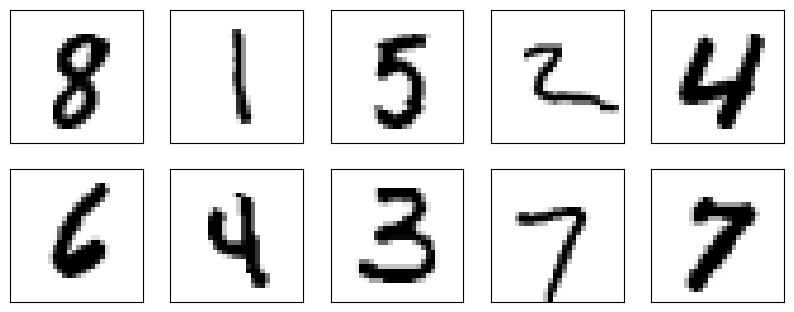

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = images[i].reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [7]:
model_nn = MLP()
trained_model_nn, history_nn, training_time_nn = train_model(model_nn, train_loader_nn, val_loader_nn, "mlp", num_epochs)
print(f"Training time for NN: {training_time_nn:.2f} minutes.")


Epoch 1, Loss: 0.2657, Acc: 0.9214, Val Loss: 0.1083, Val Acc: 0.9681
Epoch 2, Loss: 0.1556, Acc: 0.9523, Val Loss: 0.0863, Val Acc: 0.9744
Epoch 3, Loss: 0.1311, Acc: 0.9594, Val Loss: 0.0860, Val Acc: 0.9747
Epoch 4, Loss: 0.1192, Acc: 0.9627, Val Loss: 0.0766, Val Acc: 0.9776
Epoch 5, Loss: 0.1091, Acc: 0.9664, Val Loss: 0.0723, Val Acc: 0.9789
Epoch 6, Loss: 0.1019, Acc: 0.9672, Val Loss: 0.0718, Val Acc: 0.9789
Epoch 7, Loss: 0.0934, Acc: 0.9699, Val Loss: 0.0686, Val Acc: 0.9790
Epoch 8, Loss: 0.0937, Acc: 0.9700, Val Loss: 0.0713, Val Acc: 0.9794
Epoch 9, Loss: 0.0891, Acc: 0.9718, Val Loss: 0.0733, Val Acc: 0.9790
Epoch 10, Loss: 0.0868, Acc: 0.9731, Val Loss: 0.0675, Val Acc: 0.9803
Epoch 11, Loss: 0.0835, Acc: 0.9733, Val Loss: 0.0680, Val Acc: 0.9799
Epoch 12, Loss: 0.0839, Acc: 0.9732, Val Loss: 0.0654, Val Acc: 0.9777
Epoch 13, Loss: 0.0834, Acc: 0.9734, Val Loss: 0.0650, Val Acc: 0.9818
Epoch 14, Loss: 0.0815, Acc: 0.9739, Val Loss: 0.0655, Val Acc: 0.9821
Epoch 15, Loss:

In [8]:
test_acc_nn, report_nn, cm_nn, test_preds_nn, test_labels_nn,summary_nn = evaluate_model(trained_model_nn, test_loader_nn)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
              ReLU-2                  [-1, 256]               0
           Dropout-3                  [-1, 256]               0
       BatchNorm1d-4                  [-1, 256]             512
            Linear-5                  [-1, 128]          32,896
              ReLU-6                  [-1, 128]               0
           Dropout-7                  [-1, 128]               0
       BatchNorm1d-8                  [-1, 128]             256
            Linear-9                   [-1, 10]           1,290
Total params: 235,914
Trainable params: 235,914
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.90
Estimated Total Size (MB): 0.91
-------------------------------------------

In [9]:
print(f"Test Accuracy for NN: {test_acc_nn * 100:.2f}%")

Test Accuracy for NN: 98.07%


In [10]:
from sklearn.metrics import classification_report
macro_f1_nn = classification_report(test_preds_nn, test_labels_nn, output_dict=True)['macro avg']['f1-score']
print(f"NN macro f1: {macro_f1_nn:.2f}")

NN macro f1: 0.98


In [11]:
trainable_params_nn = sum(p.numel() for p in model_nn.parameters() if p.requires_grad)
print(f"Trainable parameters NN: {trainable_params_nn}")


Trainable parameters NN: 235914


In [12]:
print(report_nn)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



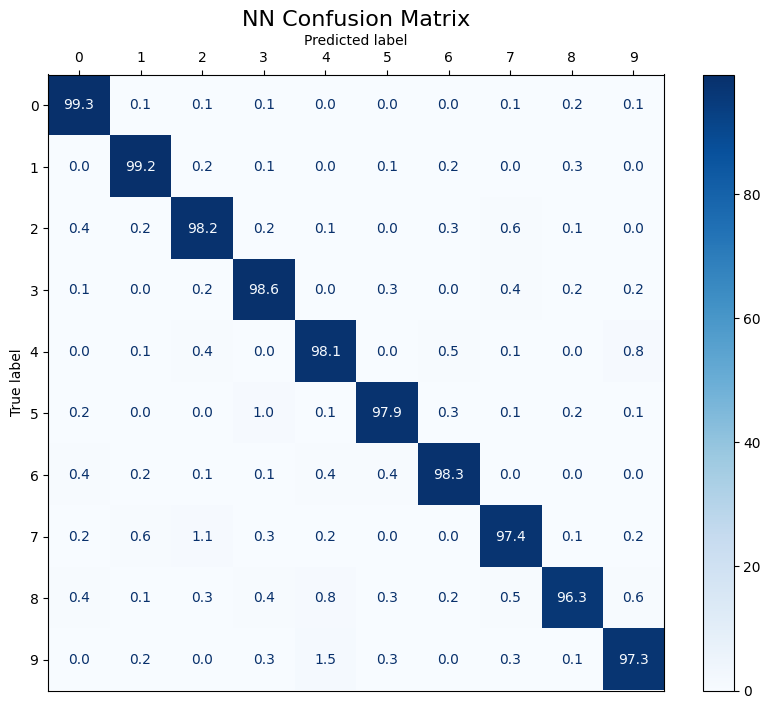

In [13]:

display_confusion_matrix(cm_nn, "NN Confusion Matrix")


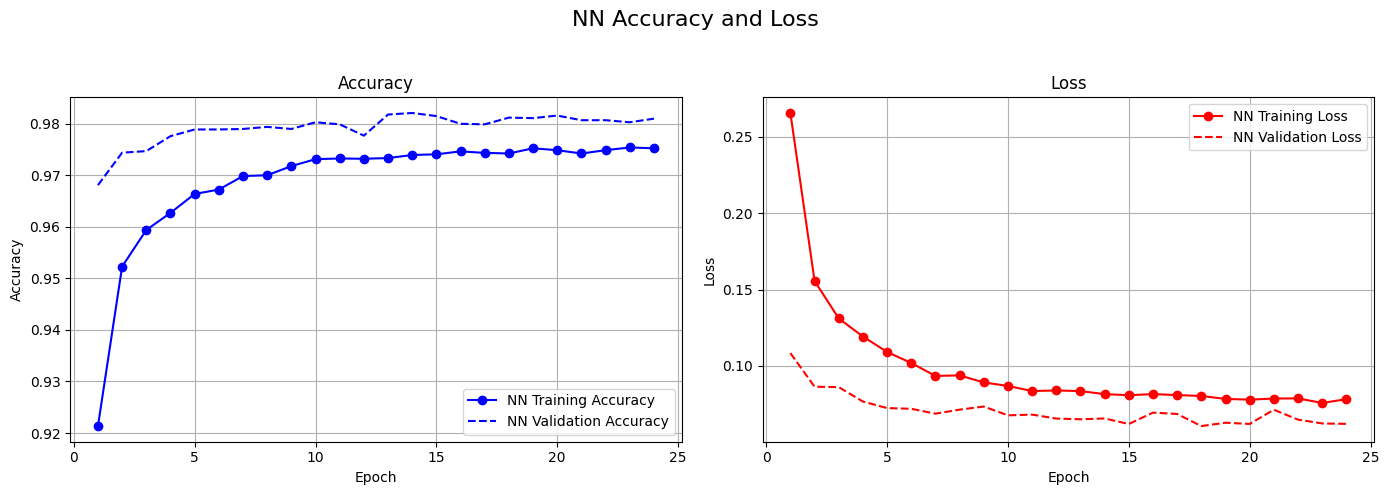

In [14]:
plot_training_graphs(history_nn, "NN", "NN Accuracy and Loss")

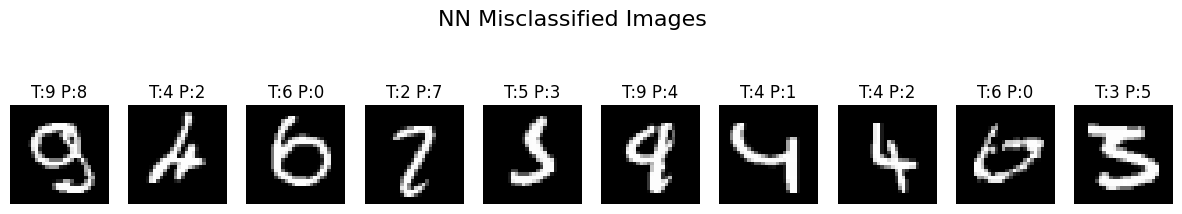

In [20]:
misclassified_nn = np.where(test_preds_nn != test_labels_nn)[0]
plot_misclassified_images(misclassified_nn, x_test_nn, y_test_nn, test_preds_nn, "NN Misclassified Images")


# 2. CNN

In [21]:
train_loader_cnn, val_loader_cnn, test_loader_cnn = load_data_cnn(batch_size)

In [22]:
model_cnn = CNN()


In [ ]:
trained_model_cnn, history_cnn, training_time_cnn = train_model(model_cnn, train_loader_cnn, val_loader_cnn, "cnn", num_epochs)
print(f"Training time for CNN: {training_time_cnn:.2f} minutes.")


Epoch 1, Loss: 0.0882, Acc: 0.9724, Val Loss: 0.0678, Val Acc: 0.9803
Epoch 2, Loss: 0.0380, Acc: 0.9881, Val Loss: 0.0793, Val Acc: 0.9779
Epoch 3, Loss: 0.0316, Acc: 0.9901, Val Loss: 0.0507, Val Acc: 0.9869
Epoch 4, Loss: 0.0275, Acc: 0.9913, Val Loss: 0.0512, Val Acc: 0.9867


In [ ]:
test_acc_cnn, report_cnn, cm_cnn, test_preds_cnn, test_labels_cnn, summary_cnn = evaluate_model(trained_model_cnn, test_loader_cnn, is_cnn=True)


--- Evaluation of Convolutional Neural Network (CNN) Model ---
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
              ReLU-2          [-1, 128, 28, 28]               0
           Dropout-3          [-1, 128, 28, 28]               0
       BatchNorm2d-4          [-1, 128, 28, 28]             256
            Conv2d-5           [-1, 64, 28, 28]          73,792
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
           Dropout-8           [-1, 64, 14, 14]               0
       BatchNorm2d-9           [-1, 64, 14, 14]             128
          Flatten-10                [-1, 12544]               0
           Linear-11                  [-1, 124]       1,555,580
             ReLU-12                  [-1, 124]               0
           Linear-13                   

In [ ]:

print(report_cnn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(f"Test Accuracy: {test_acc_cnn * 100:.2f}%")

Test Accuracy: 99.15%


In [ ]:
macro_f1_cnn = classification_report(test_preds_cnn, test_labels_cnn, output_dict=True)['macro avg']['f1-score']
print(f"CNN macro f1: {macro_f1_cnn:.2f}")
trainable_params_cnn = sum(p.numel() for p in model_cnn.parameters() if p.requires_grad)
print(f"Trainable parameters CNN: {trainable_params_cnn}")


CNN macro f1: 0.99
Trainable parameters CNN: 1632286


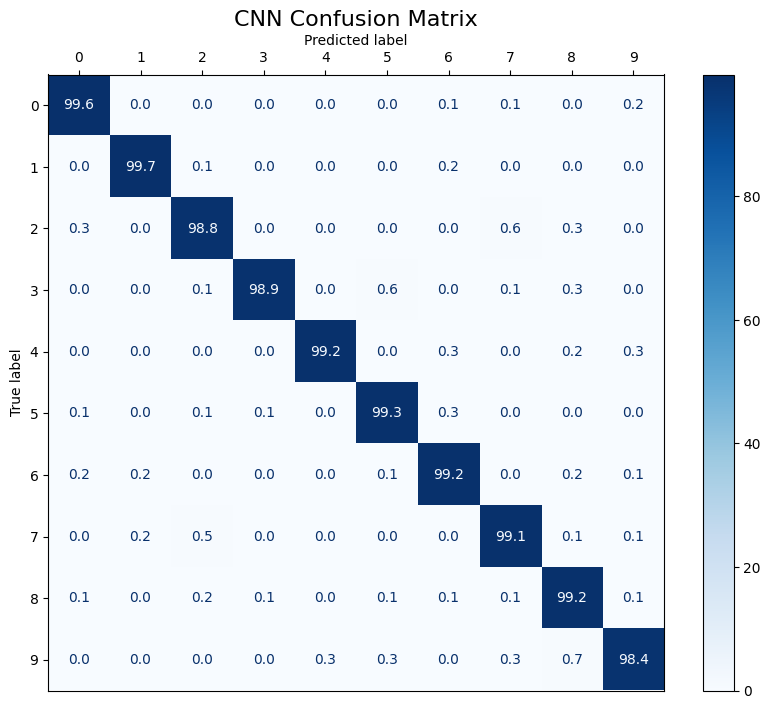

In [ ]:
display_confusion_matrix(cm_cnn, "CNN Confusion Matrix")


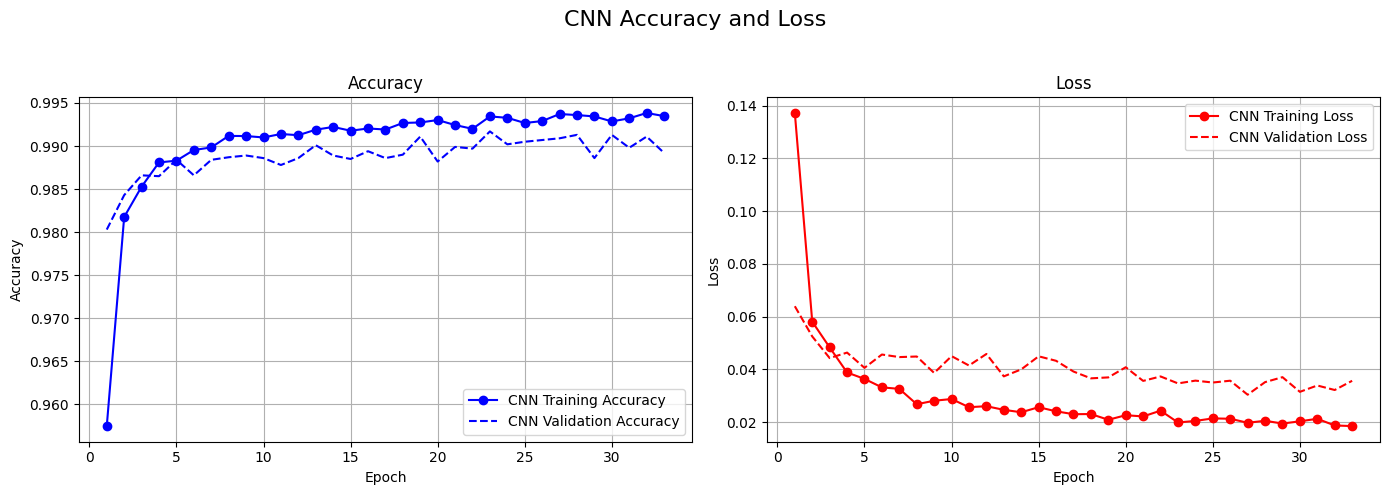

In [ ]:
plot_training_graphs(history_cnn, "CNN", "CNN Accuracy and Loss")

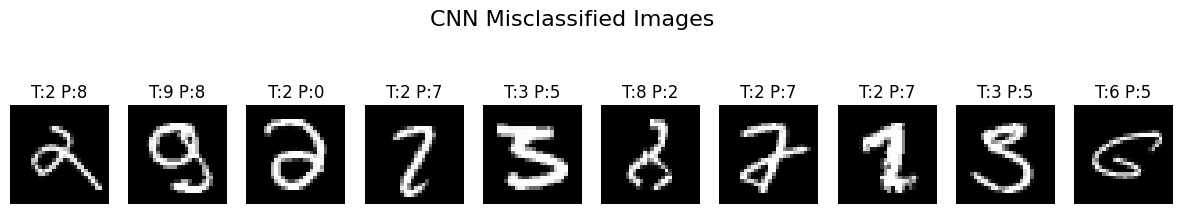

In [ ]:
misclassified_cnn = np.where(test_preds_cnn != test_labels_cnn)[0]
plot_misclassified_images(misclassified_cnn, x_test_nn.squeeze(), y_test_nn, test_preds_cnn, "CNN Misclassified Images")



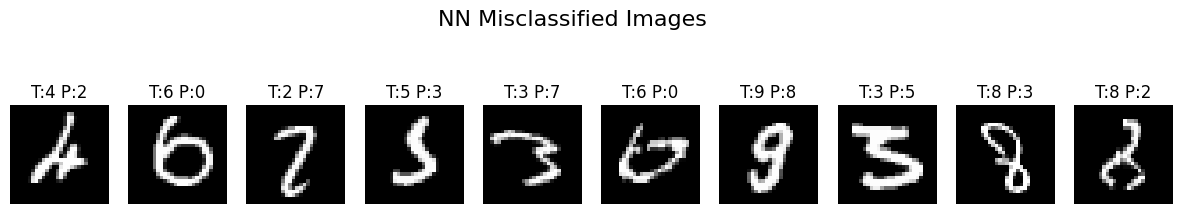

In [ ]:
plot_misclassified_images(misclassified_nn, x_test_nn, y_test_nn, test_preds_nn, "NN Misclassified Images")


In [ ]:
# first 10 misclassified index CNN
misclassified_cnn[:10]

array([ 149,  151,  318,  321,  449,  582,  583,  659,  938, 1014])

In [ ]:
# first 10 misclassified index NN
misclassified_nn[:10]

array([247, 259, 321, 340, 381, 445, 448, 449, 543, 582])

> Below are incorrect predicted by CNN but correct classified by NN


In [ ]:
#CNN predicted false
not_exists_nn = [x for x in misclassified_cnn if x not in misclassified_nn]
missclassified_index_cnn = not_exists_nn[0]
print(missclassified_index_cnn)

149


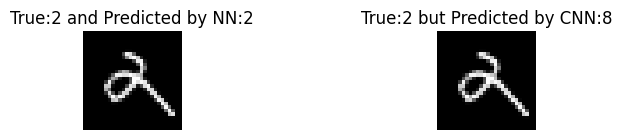

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1, 10, 1)
plt.imshow(x_test_nn[missclassified_index_cnn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_cnn]} and Predicted by NN:{test_preds_nn[missclassified_index_cnn]}")
plt.axis('off')

plt.subplot(1, 10, 4)
plt.imshow(x_test_nn[missclassified_index_cnn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_cnn]} but Predicted by CNN:{test_preds_cnn[missclassified_index_cnn]}")
plt.axis('off')

plt.show()

In [ ]:
#NN predicted false
not_exists_cnn = [x for x in misclassified_nn if x not in misclassified_cnn]
missclassified_index_nn = not_exists_cnn[0]
print(missclassified_index_nn)

247


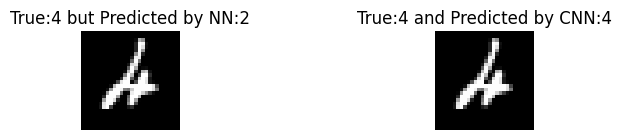

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1, 10, 1)
plt.imshow(x_test_nn[missclassified_index_nn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_nn]} but Predicted by NN:{test_preds_nn[missclassified_index_nn]}")
plt.axis('off')

plt.subplot(1, 10, 4)
plt.imshow(x_test_nn[missclassified_index_nn], cmap='gray')
plt.title(f"True:{y_test_nn[missclassified_index_nn]} and Predicted by CNN:{test_preds_cnn[missclassified_index_nn]}")
plt.axis('off')

plt.show()

### those digits predicted incorrect by both NN and CNN

In [ ]:
common_misclassified = list(set(misclassified_nn[:10]) & set(misclassified_cnn[:10]))[0]
print("common misclassified",common_misclassified)

common misclassified 321


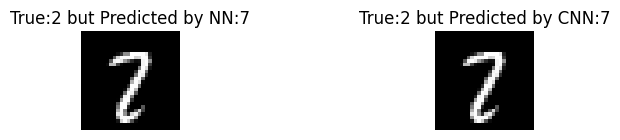

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1, 10, 1)
plt.imshow(x_test_nn[common_misclassified], cmap='gray')
plt.title(f"True:{y_test_nn[common_misclassified]} but Predicted by NN:{test_preds_nn[common_misclassified]}")
plt.axis('off')

plt.subplot(1, 10, 4)
plt.imshow(x_test_nn[common_misclassified], cmap='gray')
plt.title(f"True:{y_test_nn[common_misclassified]} but Predicted by CNN:{test_preds_cnn[common_misclassified]}")
plt.axis('off')

plt.show()

In [ ]:
results = []

   
results.append({
    "Model": "MLP",
    "#Params": trainable_params_nn,
    "Training Time (min)": round(training_time_nn, 2),
    "Test Acc %": round(test_acc_nn*100, 2),
    "Macro-F1": round(macro_f1_nn, 2),
    "avg time per epoch (min)":round(training_time_nn/len(history_nn["loss"]),2)
})

results.append({
    "Model": "CNN",
    "#Params": trainable_params_cnn,
    "Training Time (min)": round(training_time_cnn, 2),
    "Test Acc %": round(test_acc_cnn*100, 2),
    "Macro-F1": round(macro_f1_cnn, 2),
     "avg time per epoch (min)":round(training_time_cnn/len(history_cnn["loss"]),2)
})

In [ ]:
len(history_nn["loss"])

40

In [ ]:
import pandas as pd
df = pd.DataFrame(results)

In [ ]:
df.head()

,Model,#Params,Training Time (min),Test Acc %,Macro-F1,avg time per epoch (min)
0,MLP,235914,6.55,98.06,0.98,0.16
1,CNN,1632286,367.60,99.15,0.99,11.14
